# Descripción de las variables del dataset de clima

- Date: fecha de la observación meteorológica.
- Location: estación meteorológica o ciudad donde se registraron los datos.
- MinTemp: temperatura mínima registrada durante el día (°C).
- MaxTemp: temperatura máxima registrada durante el día (°C).
- Rainfall: cantidad de lluvia caída en 24 horas (mm).
- Evaporation: cantidad de agua evaporada en 24 horas (mm), medida en tanque de evaporación.
- Sunshine: número de horas de insolación efectiva durante el día.
- WindGustDir: dirección del viento más fuerte registrado en el día (puntos cardinales).
- WindGustSpeed: velocidad del viento más fuerte registrado en el día (km/h).
- WindDir9am: dirección del viento registrada a las 9:00 horas.
- WindDir3pm: dirección del viento registrada a las 15:00 horas.
- WindSpeed9am: velocidad del viento registrada a las 9:00 horas (km/h).
- WindSpeed3pm: velocidad del viento registrada a las 15:00 horas (km/h).
- Humidity9am: humedad relativa del aire a las 9:00 horas (%).
- Humidity3pm: humedad relativa del aire a las 15:00 horas (%).
- Pressure9am: presión atmosférica a nivel del mar medida a las 9:00 horas (hPa).
- Pressure3pm: presión atmosférica a nivel del mar medida a las 15:00 horas (hPa).
- Cloud9am: cobertura nubosa estimada a las 9:00 horas (octas, escala de 0 a 8).
- Cloud3pm: cobertura nubosa estimada a las 15:00 horas (octas, escala de 0 a 8).
- Temp9am: temperatura del aire a las 9:00 horas (°C).
- Temp3pm: temperatura del aire a las 15:00 horas (°C).
- RainToday: variable binaria que indica si llovió en las 24 horas previas (Yes/No).
- RainTomorrow: variable binaria que indica si llovió en las 24 horas siguientes (Yes/No). Esta es la variable objetivo a predecir en la regresión logística.

# EDA

In [48]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

from geopy.geocoders import Nominatim
import time

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler   # u otros scalers
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV,SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set_theme()

In [49]:
df = pd.read_csv("weatherAUS.csv")

In [50]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [52]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [53]:
# Hay una gran cantidad de nulos.
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Hay 3267 valores faltantes en la variable objetivo.

In [54]:
# No hay duplicados en el dataset
df.duplicated().sum()

np.int64(0)

Se observan ciudades con nombres repetidos (SydneyAirport,MelbourneAirport).

In [55]:
# Que es PearceRAAF
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [56]:
df_copy = df.copy()

Como es lógico considerando el problema, el dataset presenta un desbalanceo considerable. 

In [57]:
df_copy.RainTomorrow.value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [58]:
df_copy["Location"].unique().shape

(49,)

In [59]:
coords_dict = {
    'Albury': (-36.073773, 146.913526),
    'Badgerys Creek': (-33.883145, 150.742466),
    'Cobar': (-31.966663, 145.304505),
    'Coffs Harbour': (-30.298600, 153.109412),
    'Moree': (-29.461720, 149.840715),
    'Newcastle': (-32.919295, 151.779535),
    'Norah Head': (-33.281667, 151.567778),
    'Norfolk Island': (-29.032804, 167.948314),
    'Penrith': (-33.751195, 150.694171),
    'Richmond': (-37.807450, 144.990721),
    'Sydney': (-33.869844, 151.208285),
    'Wagga Wagga': (-35.115000, 147.367778),
    'Williamtown': (-32.815000, 151.842778),
    'Wollongong': (-34.424394, 150.893850),
    'Canberra': (-35.297591, 149.101268),
    'Tuggeranong': (-35.420977, 149.092134),
    'Mount Ginini': (-35.529744, 148.772540),
    'Ballarat': (-37.562301, 143.860565),
    'Bendigo': (-36.759018, 144.282672),
    'Sale': (-38.109446, 147.065672),
    'Melbourne': (-37.814245, 144.963173),
    'Mildura': (-34.195274, 142.150315),
    'Nhil': (-35.432540, 141.283386),
    'Portland': (-38.345623, 141.604230),
    'Watsonia': (-37.710947, 145.083781),
    'Dartmoor': (-37.895212, 141.267943),
    'Brisbane': (-27.468962, 153.023501),
    'Cairns': (-16.920666, 145.772185),
    'GoldCoast': (-28.080500, 153.430919),
    'Townsville': (-19.256939, 146.823954),
    'Adelaide': (-34.928181, 138.599931),
    'Mount Gambier': (-37.830139, 140.784263),
    'Nuriootpa': (-34.469335, 138.993901),
    'Woomera': (-31.199914, 136.825353),
    'Albany': (-35.024782, 117.883608),
    'Witchcliffe': (-34.026335, 115.100477),
    'Pearce RAAF': (-31.673960, 116.017544),
    'Perth': (-31.955897, 115.860578),
    'Salmon Gums': (-32.981517, 121.644079),
    'Walpole': (-34.977680, 116.731006),
    'Hobart': (-42.882509, 147.328123),
    'Launceston': (-41.434081, 147.137350),
    'Alice Springs': (-23.698388, 133.881289),
    'Darwin': (-12.460440, 130.841047),
    'Katherine': (-14.464616, 132.263599),
    'Uluru': (-25.345554, 131.036961)
}


In [60]:
ciudades_corregidas = {
 'BadgerysCreek': 'Badgerys Creek',
 'CoffsHarbour': 'Coffs Harbour',
 'NorahHead': 'Norah Head',
 'NorfolkIsland': 'Norfolk Island',
 'WaggaWagga': 'Wagga Wagga',
 'MountGinini': 'Mount Ginini',
 'Brisbane': 'Brisbane',
 'MountGambier': 'Mount Gambier',
 'PearceRAAF': 'Pearce RAAF',
 'SalmonGums': 'Salmon Gums',
 'AliceSprings': 'Alice Springs',
 "MelbourneAirport":"Melbourne",
 "SydneyAirport":"Sydney",
 "PerthAirport":"Perth"
}

In [61]:
df_copy['Location'] = df_copy['Location'].replace(ciudades_corregidas)

In [62]:
df_copy["Location"].unique()

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Wagga Wagga', 'Williamtown', 'Wollongong', 'Canberra',
       'Tuggeranong', 'Mount Ginini', 'Ballarat', 'Bendigo', 'Sale',
       'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor',
       'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide',
       'Mount Gambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe',
       'Pearce RAAF', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

In [63]:
# Creación de cols lat y long en base a la ciudad. 
df_copy['Latitude'] = df_copy['Location'].map(lambda x: coords_dict[x][0])
df_copy['Longitude'] = df_copy['Location'].map(lambda x: coords_dict[x][1])
df_copy['RainToday'] = df_copy['RainToday'].map({'Yes': 1, 'No': 0})

In [64]:
df_copy.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Latitude             0
Longitude            0
dtype: int64

In [65]:
# Eliminación de NAN en columna objetivo.
df_copy = df_copy.dropna(subset=["RainTomorrow"])

Para realizar la división en grupos de regiones, se tomó la decisión de utilizar la información de la página [Climate Change in Australia](https://www.climatechangeinaustralia.gov.au/en/overview/about-site). La mencionada es una página web financiada y desarrollada por el Departamento de Medio Ambiente del Gobierno de Australia. Contiene una gran cantidad de información sobre el clima en australia en materia de investigaciones, observaciones, análisis e incluso proyecciones de clima mediante modelos. En la siguiente página, detallan la [división oficial de regiones por clima en autralia](https://www.climatechangeinaustralia.gov.au/en/projections-tools/regional-climate-change-explorer/clusters/?current=SSC&tooltip=true&popup=true) que se usará para agrupar nuestros datos. 


In [66]:
# Carga de shapefile
path_shp = "shapefiles" 
gdf_clusters = gpd.read_file(path_shp)

# Convertir las ciudades en un Geodataframe. 
df_ciudades = df_copy[['Location', 'Latitude', 'Longitude']].drop_duplicates().reset_index(drop=True)

# Crear geometrías tipo Point a partir de lat/long
gdf_ciudades = gpd.GeoDataFrame(
    df_ciudades,
    geometry=gpd.points_from_xy(df_ciudades.Longitude, df_ciudades.Latitude),
    crs="EPSG:4326"  # Sistema de coordenadas WGS84 (lat/long)
)


if gdf_clusters.crs != gdf_ciudades.crs:
    gdf_clusters = gdf_clusters.to_crs(gdf_ciudades.crs)

gdf_resultado = gpd.sjoin(gdf_ciudades, gdf_clusters, how="left", predicate="within")


df_ciudades_regiones = pd.DataFrame(gdf_resultado.drop(columns="geometry"))

In [67]:
df_ciudades_regiones.head()

,Location,Latitude,Longitude,index_right,OBJECTID,Shape_Leng,Shape_Area,code,label
0,Albury,-36.073773,146.913526,2.0,4.0,45.869349,45.299310,MB,Murray Basin
1,Badgerys Creek,-33.883145,150.742466,1.0,2.0,56.117544,34.176299,EC,East Coast
2,Cobar,-31.966663,145.304505,4.0,6.0,137.457553,407.116072,R,Rangelands
3,Coffs Harbour,-30.298600,153.109412,1.0,2.0,56.117544,34.176299,EC,East Coast
4,Moree,-29.461720,149.840715,0.0,1.0,43.872364,28.309947,CS,Central Slopes


In [ ]:
# Parece haber nulos. 
df_ciudades_regiones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     46 non-null     object 
 1   Latitude     46 non-null     float64
 2   Longitude    46 non-null     float64
 3   index_right  45 non-null     float64
 4   OBJECTID     45 non-null     float64
 5   Shape_Leng   45 non-null     float64
 6   Shape_Area   45 non-null     float64
 7   code         45 non-null     object 
 8   label        45 non-null     object 
dtypes: float64(6), object(3)
memory usage: 3.6+ KB


La única entrada con nulos es la de las islas Norfolk, la cual está al este de Australia. Debido a los lejos que se encuentra de la mayoría de las regiones parece que no se clasificó como parte de ninguna. Se toma la decisión a continuación de asignarla como parte de la región *"East Coast"*, debido a que es la que está mas cercana a ella. 

In [68]:
df_ciudades_regiones[df_ciudades_regiones["Location"] == "Norfolk Island"]

,Location,Latitude,Longitude,index_right,OBJECTID,Shape_Leng,Shape_Area,code,label
7,Norfolk Island,-29.032804,167.948314,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Asignar manualmente la región para 'Norfolk Island'
df_ciudades_regiones.loc[df_ciudades_regiones['Location'] == 'Norfolk Island', 'label'] = 'East Coast'

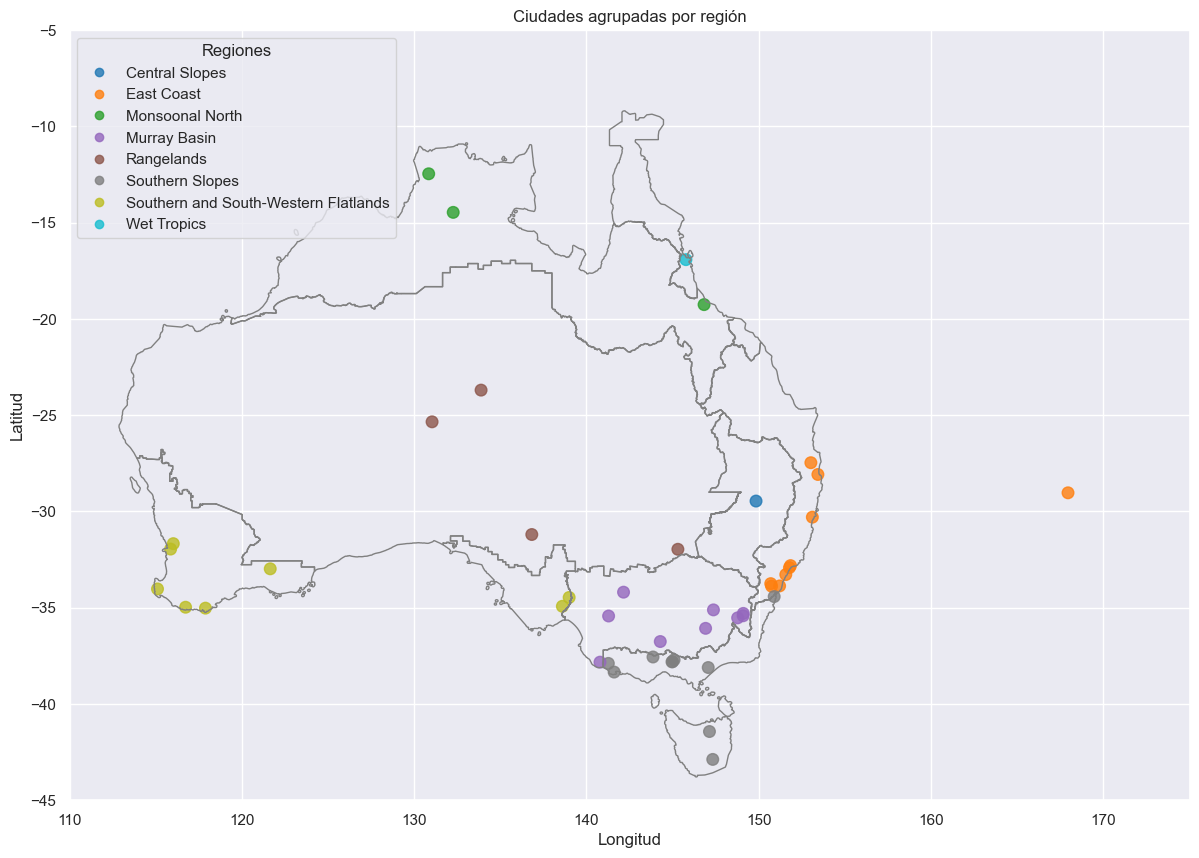

In [72]:
import matplotlib.pyplot as plt

# Asumiendo que gdf_clusters y df_ciudades_regiones ya están cargados.
# El mapeo de nombres a números de región
region_labels = sorted(df_ciudades_regiones['label'].unique())

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(18, 10))

# Graficar los polígonos del shapefile
gdf_clusters.boundary.plot(ax=ax, color="gray", linewidth=1)

# Graficar las ciudades usando el DataFrame de pandas y matplotlib
scatter = ax.scatter(
    df_ciudades_regiones['Longitude'], 
    df_ciudades_regiones['Latitude'], 
    c=df_ciudades_regiones['label'].astype('category').cat.codes, 
    cmap="tab10", 
    s=70, 
    alpha=0.8
)

# Añadir la leyenda con los nombres de las regiones
handles, _ = scatter.legend_elements()
ax.legend(handles, region_labels, loc="upper left", title="Regiones")

# Configurar el resto del gráfico
ax.set_title("Ciudades agrupadas por región")
ax.set_xlabel("Longitud")
ax.set_xlim(110, 175) 
ax.set_ylabel("Latitud")
ax.set_ylim(-45, -5) 

plt.show()

In [73]:
#  Seleccionar y renombrar la columna 'label' a 'region'
df_regiones = df_ciudades_regiones[['Location', 'label']].rename(columns={'label': 'region'})

# 2. Unir los dataframes
df_copy = pd.merge(df_copy, df_regiones, on='Location', how='left')

# Opcional: Verificar el resultado
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [74]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['month'] = df_copy['Date'].dt.month

In [ ]:
# Creación de columna temporada. 
def stations(df_copy):
    if df_copy['month'] == 12 or df_copy['month'] == 1 or df_copy['month'] == 2:
        return 'summer'
    elif df_copy['month'] == 3 or df_copy['month'] == 4 or df_copy['month'] == 5:
        return 'autumn'
    elif df_copy['month'] == 6 or df_copy['month'] == 7 or df_copy['month'] == 8:
        return 'winter'
    else:
        return 'spring'

In [76]:
df_copy['season'] = df_copy.apply(stations, axis=1)

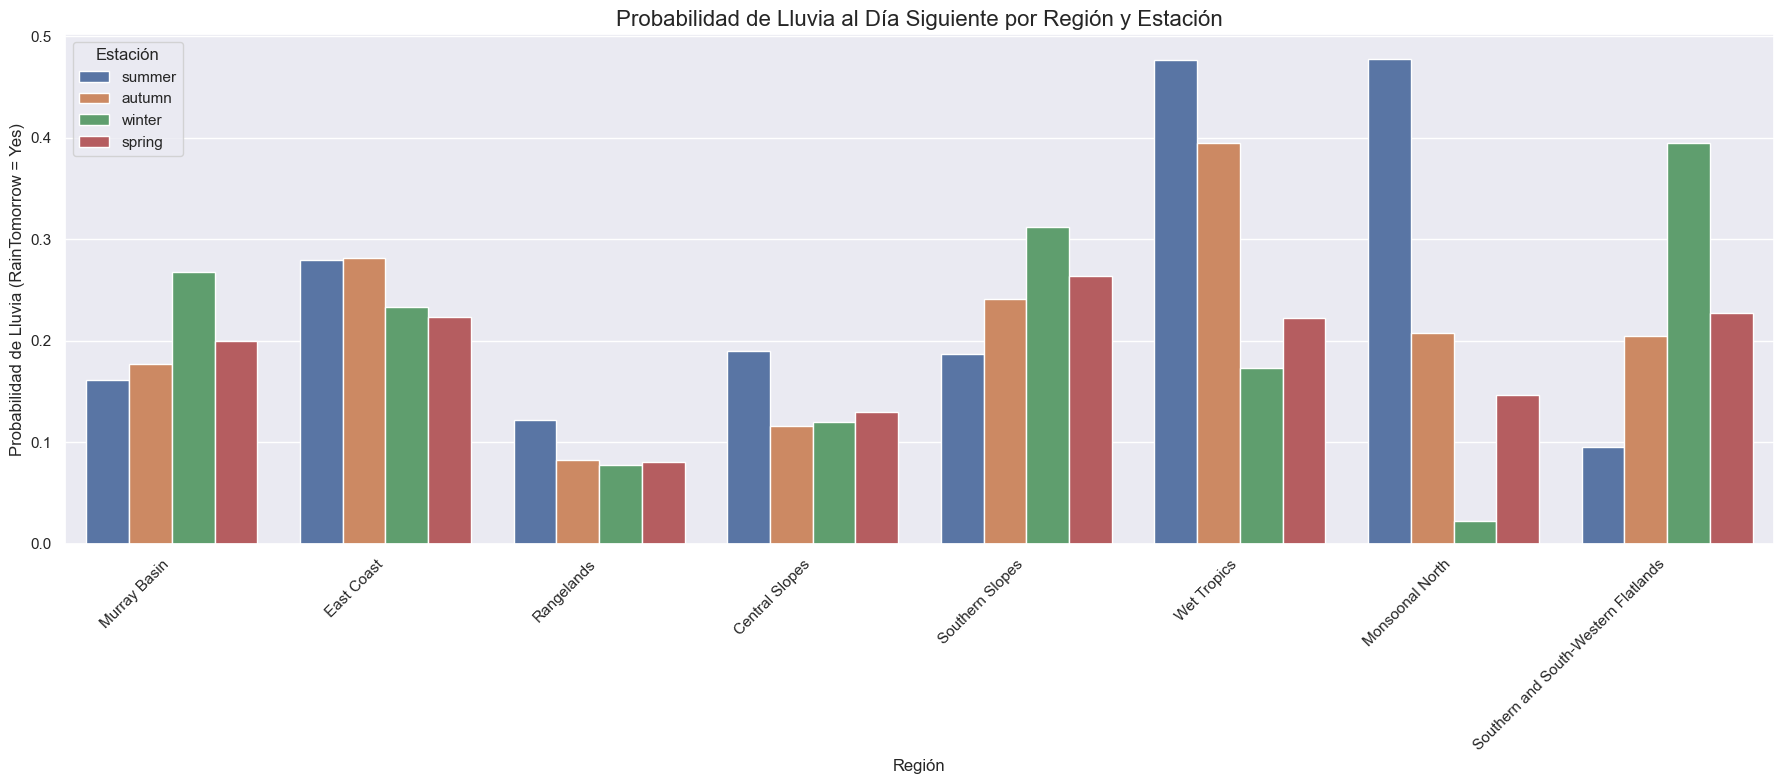

In [77]:
# Como se relaciona la columna de region y season con la lluvia
df_copy['RainTomorrow_numeric'] = df_copy['RainTomorrow'].map({'Yes': 1, 'No': 0})


plt.figure(figsize=(18, 8))
sns.barplot(data=df_copy, x='region', y='RainTomorrow_numeric', hue='season', errorbar=None)
plt.title('Probabilidad de Lluvia al Día Siguiente por Región y Estación', fontsize=16)
plt.ylabel('Probabilidad de Lluvia (RainTomorrow = Yes)')
plt.xlabel('Región')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estación')
plt.tight_layout()
plt.show()

# dropeamos la columna auxiliar
df_copy.drop('RainTomorrow_numeric', axis=1, inplace=True)


In [78]:
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first') # sparse_output=False to get a dense array

# Fit and transform the 'season' column
season_encoded = encoder.fit_transform(df_copy[['season', 'region']])

# Create a DataFrame with the encoded columns
season_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season', 'region']), index=df_copy.index)

# Concatenate with the original DataFrame
df_copy = pd.concat([df_copy, season_df], axis=1)

# No dropeamos la columna de region para usarla mas adelante para imputar ciertas columnas
df_copy.drop(columns=['season'], inplace=True) 


In [79]:
# Mapear los nombres de las columnas para su modificación
column_mapping = {col: col.replace(' ', '_').replace('-', '_') for col in df_copy.columns}

# Renombrar las columnas del DataFrame usando el mapeo
df_copy = df_copy.rename(columns=column_mapping)

In [80]:
# Diccionario de direcciones a ángulos en grados
wind_dir_map = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

def add_all_wind_dirs_cyclic(df, colnames):
    """
    Convierte varias columnas de direcciones de viento a representaciones cíclicas
    (sin y cos). Agrega dos columnas nuevas por cada una.
    """
    for col in colnames:
        df[col + '_sin'] = df[col].map(wind_dir_map).apply(
            lambda x: np.sin(np.deg2rad(x)) if pd.notnull(x) else np.nan
        )
        df[col + '_cos'] = df[col].map(wind_dir_map).apply(
            lambda x: np.cos(np.deg2rad(x)) if pd.notnull(x) else np.nan
        )
    return df

Se codifica como cíclica las variables de dirección del viento por la naturaleza circular de la misma. 

In [81]:
cols_viento = ["WindDir3pm", "WindDir9am", "WindGustDir"]

df_copy = add_all_wind_dirs_cyclic(df_copy, cols_viento)

df_copy.drop(columns=['WindGustDir', 'WindDir3pm', 'WindDir9am'], axis=1, inplace=True)

In [82]:
pd.set_option('display.max_columns', None)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Date                                         142193 non-null  datetime64[ns]
 1   Location                                     142193 non-null  object        
 2   MinTemp                                      141556 non-null  float64       
 3   MaxTemp                                      141871 non-null  float64       
 4   Rainfall                                     140787 non-null  float64       
 5   Evaporation                                  81350 non-null   float64       
 6   Sunshine                                     74377 non-null   float64       
 7   WindGustSpeed                                132923 non-null  float64       
 8   WindSpeed9am                                 140845 non-null  fl

In [83]:
df_copy.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,region,month,season_spring,season_summer,season_winter,region_East_Coast,region_Monsoonal_North,region_Murray_Basin,region_Rangelands,region_Southern_Slopes,region_Southern_and_South_Western_Flatlands,region_Wet_Tropics,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_sin,WindGustDir_cos
108193,2015-04-11,Albany,17.0,20.0,2.6,2.8,1.2,NaN,4.0,46.0,92.0,90.0,1005.7,1005.7,8.0,8.0,17.9,18.4,1.0,Yes,-35.024782,117.883608,Southern and South-Western Flatlands,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.707107,-0.707107,-0.923880,0.382683,NaN,NaN
4347,2012-11-11,Badgerys Creek,8.4,22.9,0.0,NaN,NaN,31.0,9.0,17.0,55.0,39.0,1028.6,1025.5,NaN,NaN,18.6,22.1,0.0,No,-33.883145,150.742466,East Coast,11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.923880,-0.382683,0.707107,-0.707107,0.923880,-0.382683
20192,2016-04-26,Norah Head,16.0,23.6,0.4,NaN,NaN,28.0,11.0,11.0,86.0,66.0,1030.2,1027.3,NaN,NaN,19.4,22.1,0.0,No,-33.281667,151.567778,East Coast,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,-0.707107,-0.382683,-0.923880,0.707107,0.707107


In [84]:
# Calcula la suma de nulos y filtra para mostrar solo las columnas con un conteo > 0
df_copy.isna().sum()[df_copy.isna().sum() > 0]

MinTemp              637
MaxTemp              322
Rainfall            1406
Evaporation        60843
Sunshine           67816
WindGustSpeed       9270
WindSpeed9am        1348
WindSpeed3pm        2630
Humidity9am         1774
Humidity3pm         3610
Pressure9am        14014
Pressure3pm        13981
Cloud9am           53657
Cloud3pm           57094
Temp9am              904
Temp3pm             2726
RainToday           1406
WindDir3pm_sin      3778
WindDir3pm_cos      3778
WindDir9am_sin     10013
WindDir9am_cos     10013
WindGustDir_sin     9330
WindGustDir_cos     9330
dtype: int64

POR QUE SE AÑADE LA DIF DE HUMEDAD Y PRESIÓN?

In [85]:
# Posibles nuevas columnas relevantes

df_copy['Month_sin'] = np.sin(2 * np.pi * df_copy['month']/12)
df_copy['Month_cos'] = np.cos(2 * np.pi * df_copy['month']/12)
df_copy.drop('month', axis=1, inplace=True)

# Rango de Temperatura Diario
df_copy['TempRange'] = df_copy['MaxTemp'] - df_copy['MinTemp']

# Diferencia de Humedad
df_copy['HumidityDiff'] = df_copy['Humidity9am'] - df_copy['Humidity3pm']

# Diferencia de Presión
df_copy['PressureDiff'] = df_copy['Pressure9am'] - df_copy['Pressure3pm']

In [86]:
### modelo base probamos dropear estas 4 cols con nan > 40%
#df_copy.drop(columns=['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [111]:
df_copy.columns 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Latitude', 'Longitude', 'region', 'season_spring', 'season_summer',
       'season_winter', 'region_East_Coast', 'region_Monsoonal_North',
       'region_Murray_Basin', 'region_Rangelands', 'region_Southern_Slopes',
       'region_Southern_and_South_Western_Flatlands', 'region_Wet_Tropics',
       'WindDir3pm_sin', 'WindDir3pm_cos', 'WindDir9am_sin', 'WindDir9am_cos',
       'WindGustDir_sin', 'WindGustDir_cos', 'Month_sin', 'Month_cos',
       'TempRange', 'HumidityDiff', 'PressureDiff'],
      dtype='object')

# Split

In [88]:
X = df_copy.drop('RainTomorrow', axis=1)
y = df_copy['RainTomorrow']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 101064 to 119377
Data columns (total 43 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Date                                         113754 non-null  datetime64[ns]
 1   Location                                     113754 non-null  object        
 2   MinTemp                                      113241 non-null  float64       
 3   MaxTemp                                      113496 non-null  float64       
 4   Rainfall                                     112623 non-null  float64       
 5   Evaporation                                  65059 non-null   float64       
 6   Sunshine                                     59410 non-null   float64       
 7   WindGustSpeed                                106314 non-null  float64       
 8   WindSpeed9am                                 112672 non-null  fl

In [91]:
# Calculamos el porcentaje de nulos y lo multiplicamos por 100
missing_percent = X_train.isnull().mean() * 100

# Filtramos para quedarnos solo con las columnas que tienen valores nulos (> 0)
# y las ordenamos de mayor a menor
missing_percent_filtered = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Porcentaje de valores nulos por columna (solo > 0%):")
print(missing_percent_filtered)

Porcentaje de valores nulos por columna (solo > 0%):
Sunshine           47.773265
Evaporation        42.807286
Cloud3pm           40.147160
Cloud9am           37.692740
PressureDiff       10.053273
Pressure9am         9.922288
Pressure3pm         9.900311
WindDir9am_sin      7.081070
WindDir9am_cos      7.081070
WindGustDir_sin     6.579988
WindGustDir_cos     6.579988
WindGustSpeed       6.540429
HumidityDiff        3.033739
WindDir3pm_cos      2.695290
WindDir3pm_sin      2.695290
Humidity3pm         2.546724
Temp3pm             1.936635
WindSpeed3pm        1.872462
Humidity9am         1.246550
RainToday           0.994251
Rainfall            0.994251
WindSpeed9am        0.951175
Temp9am             0.646131
TempRange           0.610088
MinTemp             0.450973
MaxTemp             0.226805
dtype: float64


Se observan una cantidad considerable de nulos presentes en el dataset. Algunas variables como sunshine cuentan con casi 50% de nulos. Aquellas columnas cuya cantidad de nulos sea mayor a 40% serán analizadas en función de su importancia para las predicciones del modelo, evaluando la posibilidad de no utilizarlas si no se consigue un método de imputación que sea pertinente. 

In [92]:
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 
       'Temp3pm', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindDir9am_sin', 'WindDir9am_cos',
       'WindGustDir_sin', 'WindGustDir_cos', 'Month_sin', 'Month_cos',
       'TempRange', 'HumidityDiff', 'PressureDiff']


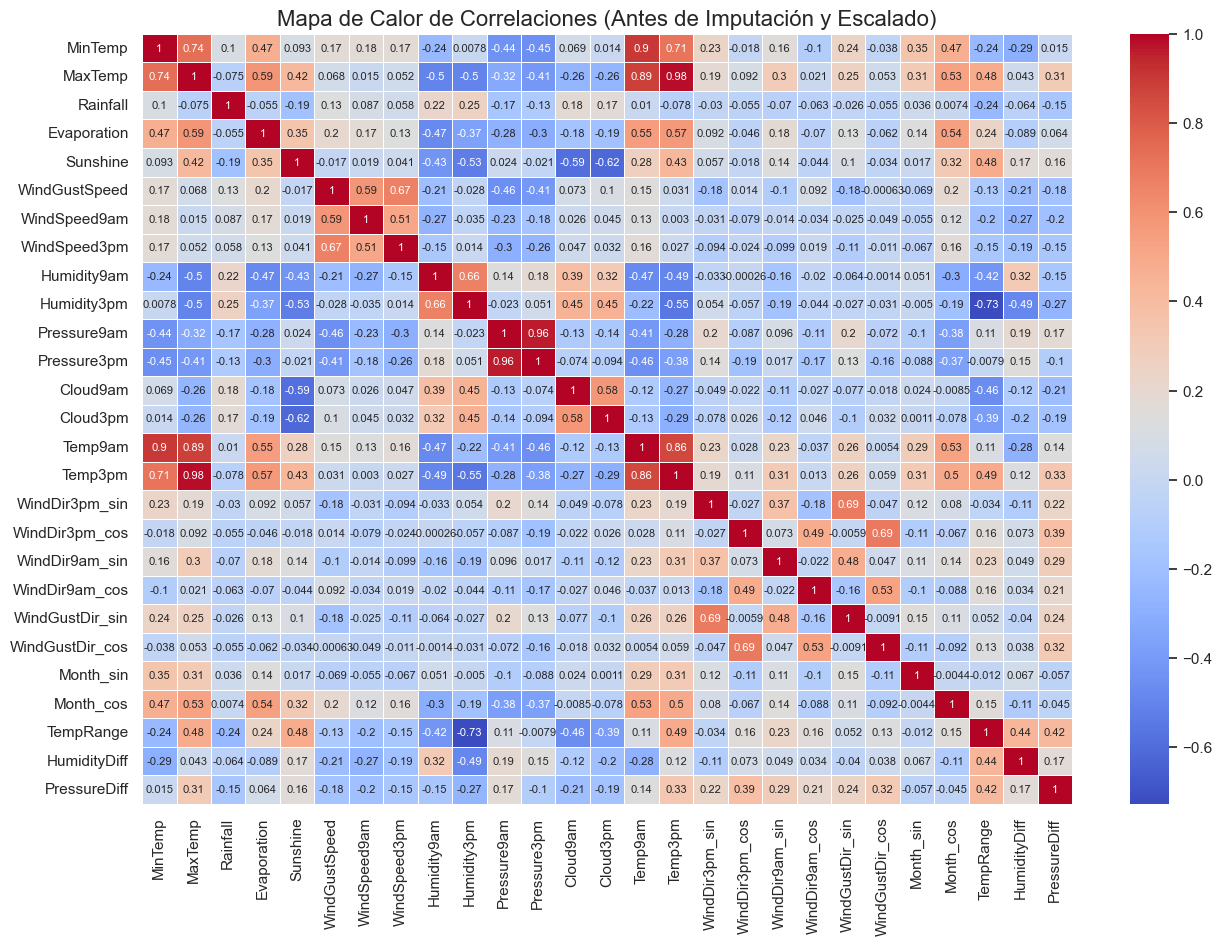

In [121]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    X_train[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=.5,
    annot_kws={'size': 8}  
)
plt.title('Mapa de Calor de Correlaciones (Antes de Imputación y Escalado)', fontsize=16)
plt.show()

En el siguiente gráfico se observan todas las distribuciones de variables numéricas anted de realizar la imputación de valores faltantes. 

Mostrando histogramas para 27 variables numéricas...


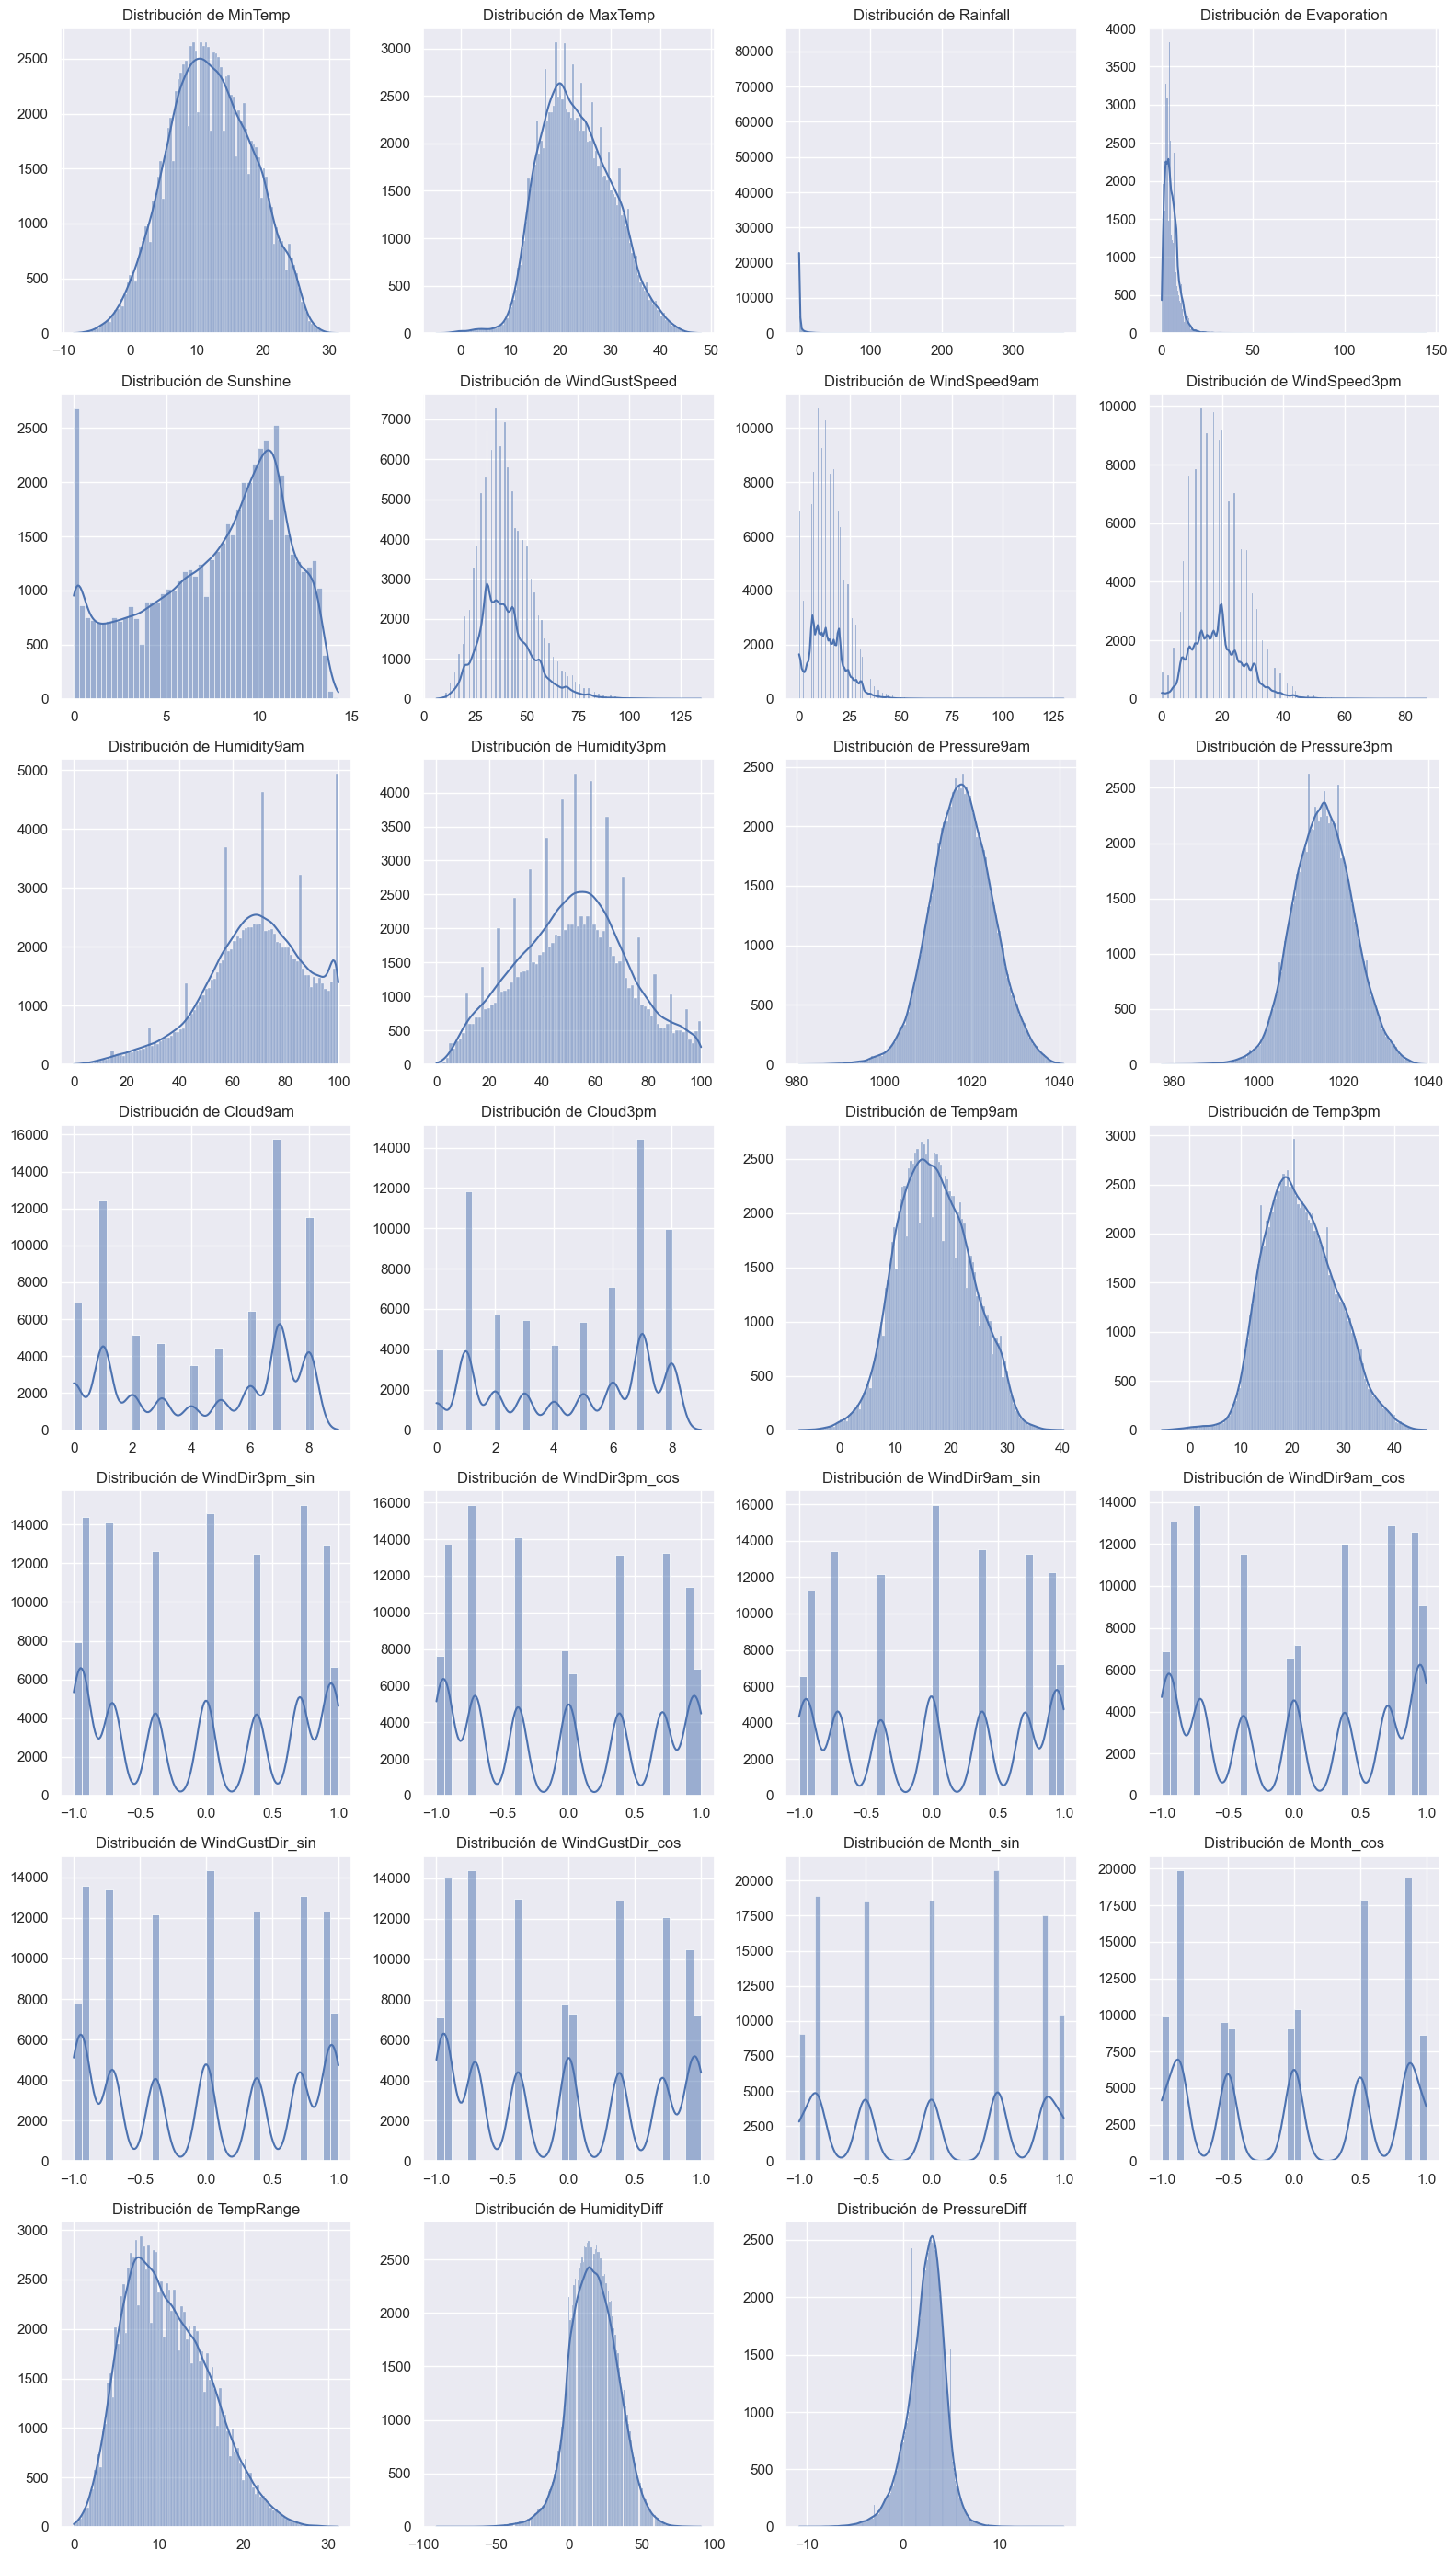

In [ ]:
n_cols = 4
n_rows = (len(num_cols) - 1) // n_cols + 1

print(f"Mostrando histogramas para {len(num_cols)} variables numéricas...")
plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel("") # Opcional: limpiar ejes para mayor claridad
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [94]:
columnas_a_imputar = [
    'Pressure9am',
    'Pressure3pm',
    'WindDir9am_sin',
    'WindDir9am_cos',
    'WindGustDir_sin',
    'WindGustDir_cos',
    'WindGustSpeed',
    'WindDir3pm_cos',
    'WindDir3pm_sin',
    'Humidity3pm',
    'Temp3pm',
    'WindSpeed3pm',
    'Humidity9am',
    'Rainfall',
    'WindSpeed9am',
    'Temp9am',
    'MinTemp',
    'MaxTemp'
]

In [95]:
columnas_a_imputar_exp2 = [
    'Sunshine',
    'Evaporation',
    'Cloud3pm',
    'Cloud9am',
    'PressureDiff',
    'Pressure9am',
    'Pressure3pm',
    'WindDir9am_sin',
    'WindDir9am_cos',
    'WindGustDir_sin',
    'WindGustDir_cos',
    'WindGustSpeed',
    'HumidityDiff',
    'WindDir3pm_cos',
    'WindDir3pm_sin',
    'Humidity3pm',
    'Temp3pm',
    'WindSpeed3pm',
    'Humidity9am',
    'Rainfall',
    'WindSpeed9am',
    'Temp9am',
    'TempRange',
    'MinTemp',
    'MaxTemp'
]

ESTA IMPUTACIÓN ES ERRÓNEA PARA VARIABLES DISCRETAS. TAMBIEN SE IMPUTAN VARIALES DE SENO Y COSENO LO QUE NO ES CORRECTO. 

In [96]:
def imputar_columna_traintest(columna, X_train, X_test):
    """
    Imputa una columna tanto en X_train como en X_test evitando la fuga de datos y advertencias.
    Aprende los parámetros de X_train y los aplica a ambos.
    """
    # PRIORIDAD: Media regional-diaria (APRENDIDA SOLO DE X_TRAIN) 
    media_por_grupo_train = X_train.groupby(['region', 'Date'])[columna].transform('mean')
    
    # Aplicar a X_train
    X_train[columna] = X_train[columna].fillna(media_por_grupo_train)
    
    # Aplicar a X_test
    medias_aprendidas = X_train.groupby(['region', 'Date'])[columna].mean().reset_index()
    X_test_merged = pd.merge(X_test.reset_index(), medias_aprendidas, on=['region', 'Date'], how='left', suffixes=('', '_aprendida'))
    X_test_merged.set_index('index', inplace=True)
    
    X_test[columna] = X_test[columna].fillna(X_test_merged[f'{columna}_aprendida'])

    # PRIORIDAD 2: ffill/bfill 
    X_train[columna] = X_train.groupby('region')[columna].ffill().bfill()
    X_test[columna] = X_test.groupby('region')[columna].ffill().bfill()

    # PRIORIDAD 3: Relleno final con media global de train 
    media_global_train = X_train[columna].mean()
    X_train[columna] = X_train[columna].fillna(media_global_train)
    X_test[columna] = X_test[columna].fillna(media_global_train) # ¡Correcto! Usar la media de train

    return X_train, X_test

# aplicamos
for columna in columnas_a_imputar_exp2:
    X_train, X_test = imputar_columna_traintest(columna, X_train, X_test)

print("¡Imputación completada!")

¡Imputación completada!


Mostrando histogramas para 27 variables numéricas...


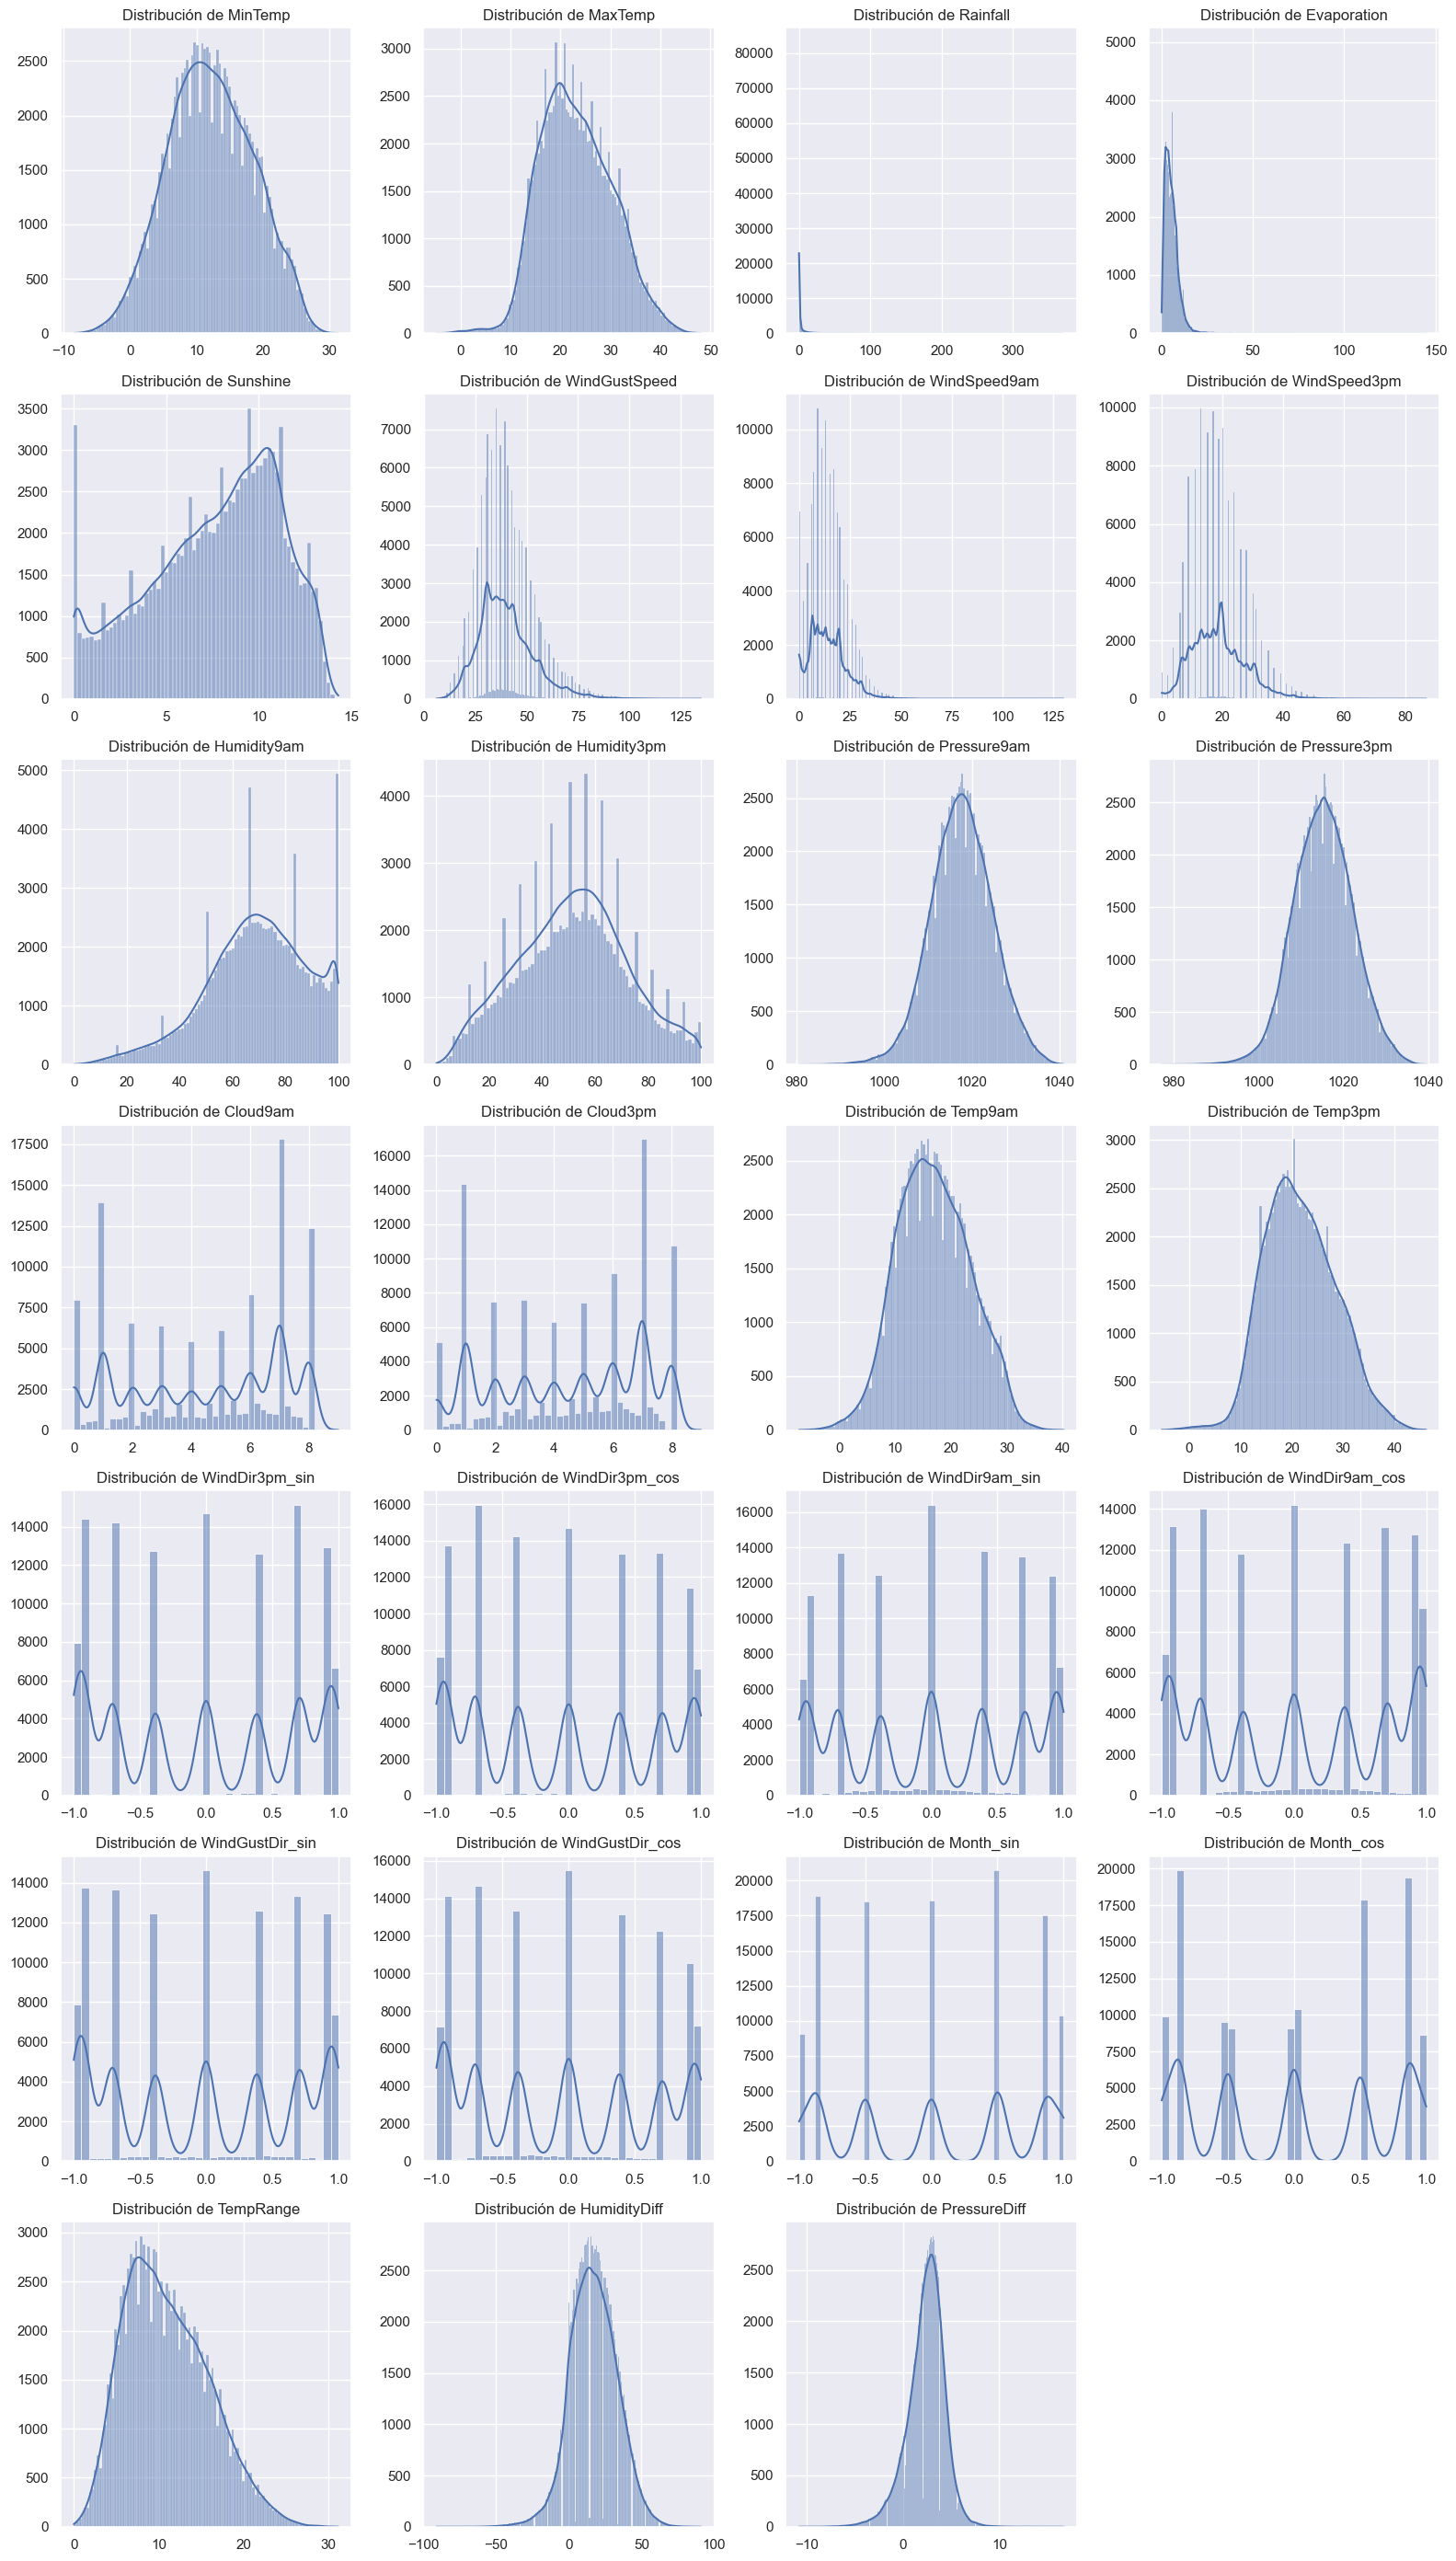

In [97]:
# 3. Crear los histogramas
print(f"Mostrando histogramas para {len(num_cols)} variables numéricas...")
plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel("") # Opcional: limpiar ejes para mayor claridad
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# verificación de nulos
X_train.isna().sum()[X_train.isna().sum() > 0]

RainToday    1131
dtype: int64

Se imputa RainToday en base a la cantidad de lluvia de la variable Rainfall. 

In [ ]:
# Definición de umbral de lluvia. 
RAIN_THRESHOLD = 1.0 


X_train.loc[(X_train['RainToday'].isnull()) & (X_train['Rainfall'] > RAIN_THRESHOLD), 'RainToday'] = 1.0
X_train.loc[(X_train['RainToday'].isnull()) & (X_train['Rainfall'] <= RAIN_THRESHOLD), 'RainToday'] = 0.0


rain_today_mode = X_train['RainToday'].mode()[0]
X_train['RainToday'] = X_train['RainToday'].fillna(rain_today_mode)



X_test.loc[(X_test['RainToday'].isnull()) & (X_test['Rainfall'] > RAIN_THRESHOLD), 'RainToday'] = 1.0
X_test.loc[(X_test['RainToday'].isnull()) & (X_test['Rainfall'] <= RAIN_THRESHOLD), 'RainToday'] = 0.0


X_test['RainToday'] = X_test['RainToday'].fillna(rain_today_mode)


print("Imputación de 'RainToday' completada.")
print(f"Moda utilizada como respaldo: {rain_today_mode}")

Imputación de 'RainToday' completada.
Moda utilizada como respaldo: 0.0


In [ ]:
# Lista de columnas a eliminar
cols_to_drop = ['Date', 'Location', 'Latitude', 'Longitude', 'region']

# Eliminar las columnas de ambos conjuntos de datos
X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

# Verificar que las columnas se han eliminado
print("Columnas finales para el entrenamiento:")
print(X_train.columns)

KeyError: "['Date', 'Location', 'Latitude', 'Longitude', 'region'] not found in axis"

# Modelo de Clasificación

In [ ]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.head()

¡Datos escalados y listos para el modelado! ✅


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,season_spring,season_summer,season_winter,region_East_Coast,region_Monsoonal_North,region_Murray_Basin,region_Rangelands,region_Southern_Slopes,region_Southern_and_South_Western_Flatlands,region_Wet_Tropics,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_sin,WindGustDir_cos,Month_sin,Month_cos,TempRange,HumidityDiff,PressureDiff
101064,1.111967,1.627033,-0.277563,2.182581,1.389161,1.206986,0.115443,-1.330683,-0.886217,-1.525183,-0.613907,-0.678835,-0.536424,-0.575232,1.128038,1.714801,-0.539269,-0.566989,1.779426,-0.582202,-0.546381,-0.241178,-0.473095,-0.282403,-0.546137,2.080818,-0.147495,0.565505,-1.263118,1.335822,-0.568531,1.030700,-0.958744,0.693961,1.247997,0.900669,0.908569,0.211492
18241,-0.742913,-0.730485,-0.254091,-0.720866,0.063028,-0.068913,-0.337092,0.385043,-0.372175,-0.406911,0.396111,0.528538,-0.916374,-0.895315,-0.633815,-0.658224,-0.539269,-0.566989,-0.561979,1.717616,1.830225,-0.241178,-0.473095,-0.282403,-0.546137,-0.480580,-0.147495,0.024213,-1.372605,-1.492569,-0.024801,0.022821,-1.385446,-1.242293,-0.680317,-0.089704,0.043801,-0.464616
96741,0.128134,0.025170,-0.277563,0.718803,1.132490,0.231299,-1.355296,0.385043,-0.255348,-0.364599,-0.741938,-0.707582,0.223477,-0.575232,-0.088153,0.198952,-0.539269,1.763703,-0.561979,-0.582202,-0.546381,-0.241178,-0.473095,-0.282403,-0.546137,2.080818,-0.147495,-0.975964,-0.951324,-1.061972,0.979881,-1.294035,-0.486107,-0.723476,1.247997,-0.130128,0.167339,-0.152566
139785,2.002101,1.430313,-0.277563,0.116071,-0.764023,1.732357,0.567978,0.842570,0.322949,0.118978,-1.908438,-2.029944,0.603427,-0.175128,1.913175,1.628181,-0.539269,-0.566989,1.779426,-0.582202,-0.546381,4.146313,-0.473095,-0.282403,-0.546137,-0.480580,-0.147495,-0.975964,1.082798,-0.022420,1.396034,-0.985057,1.101556,0.693961,1.247997,-0.534362,0.229108,0.367517
83246,0.487311,0.362404,-0.277563,0.684361,1.161009,-0.744389,-0.563360,-0.644393,-0.570782,-0.316241,1.022038,0.844755,0.983377,-0.975336,0.666193,0.357755,-0.539269,1.763703,-0.561979,-0.582202,1.830225,-0.241178,-0.473095,-0.282403,-0.546137,-0.480580,-0.147495,1.438676,0.065737,1.017133,-1.029483,1.448177,0.071406,-0.723476,1.247997,-0.109916,-0.265045,0.679567


In [102]:
# Muestra los valores únicos y su frecuencia
print("Valores en la variable objetivo (y_train):")
print(y_train.value_counts())

# Muestra el tipo de dato técnico de la columna
print(f"\nTipo de dato de y_train: {y_train.dtype}")

Valores en la variable objetivo (y_train):
RainTomorrow
No     88252
Yes    25502
Name: count, dtype: int64

Tipo de dato de y_train: object


Se crea el modelo y se usa class_weight='balanced' para que el modelo considere el desbalance de clases. 

In [ ]:
modelo = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  
)

# Fiteamos
modelo.fit(X_train_scaled, y_train)

# predict
y_pred_balanced = modelo.predict(X_test_scaled)

# metrica accuracy
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)


print(f"La precisión (Accuracy) del modelo balanceado es: {accuracy_balanced:.2f}")


¡Entrenamiento completo! 🏁
La precisión (Accuracy) del modelo balanceado es: 0.80


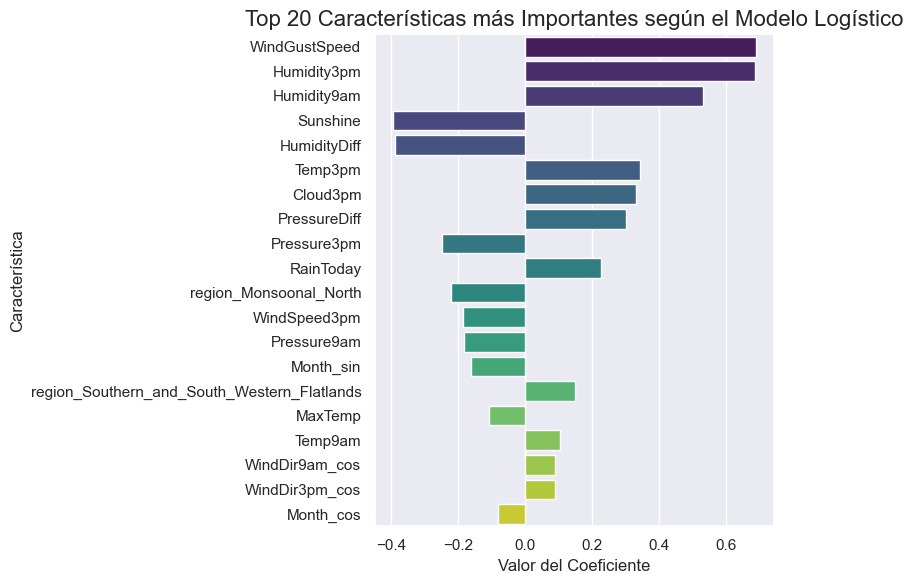

In [123]:
# Crear un DataFrame con los coeficientes
coef_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': modelo.coef_[0]
})

# Ordenar por el valor absoluto del coeficiente para ver la importancia
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Graficar las 20 características más importantes
plt.figure(figsize=(8, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df.head(20),hue = "feature", palette='viridis', legend = False)
plt.title('Top 20 Características más Importantes según el Modelo Logístico', fontsize=16)
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


Se observan en el gráfico anterior los coeficientes considerados más relevantes para el modelo. 

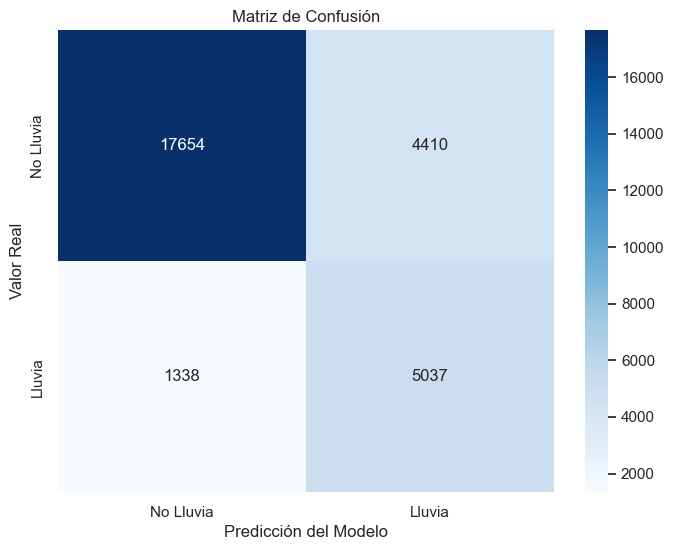

In [125]:
cm = confusion_matrix(y_test, y_pred_balanced)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lluvia', 'Lluvia'], yticklabels=['No Lluvia', 'Lluvia'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show() 

A simple vista, en base a la matriz de confusión, se puede denotar que el modelo tiene una tendencia a predecir que llueve en días en los que no. 

El puntaje AUC del modelo es: 0.8783


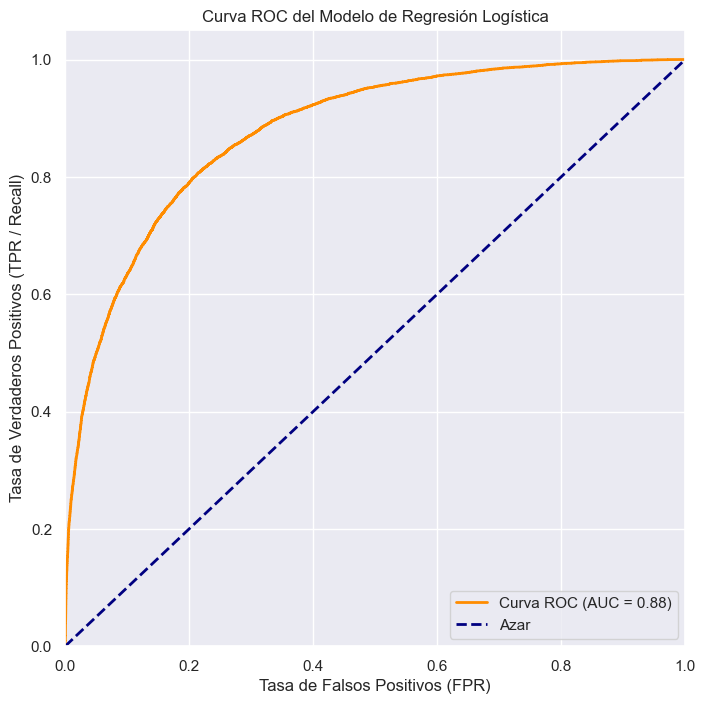

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Obtener las probabilidades de predicción para la clase positiva ('Yes')
#    predict_proba devuelve probabilidades para [clase_No, clase_Yes]
y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]

# 2. Calcular el AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"El puntaje AUC del modelo es: {auc_score:.4f}")

# 3. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Yes') #pos label para indicarle que 1 es yes

# 4. Graficar la Curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR / Recall)')
plt.title('Curva ROC del Modelo de Regresión Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show() # Mostramos la imagen en el notebook

In [128]:
import numpy as np

# Calculamos el estadístico J de Youden para cada umbral
j_scores = tpr - fpr

# Encontramos el índice del umbral que maximiza el J-score
ix = np.argmax(j_scores)

# Obtenemos el mejor umbral
best_threshold = thresholds[ix]

print(f"El mejor umbral encontrado es: {best_threshold:.4f}")
print(f"Con este umbral, se logra un TPR (Recall) de: {tpr[ix]:.4f}")
print(f"Y un FPR de: {fpr[ix]:.4f}")

El mejor umbral encontrado es: 0.4785
Con este umbral, se logra un TPR (Recall) de: 0.8066
Y un FPR de: 0.2142


El modelo de regresión logística presenta una buena capacidad de discriminación, con un valor de AUC de 0.8783, lo que indica un desempeño claramente superior al azar.

El umbral óptimo determinado mediante el estadístico de Youden fue 0.4785, con el cual se alcanza un Recall de 0.81 y una False Positive Rate de 0.21. Este punto representa un equilibrio adecuado entre sensibilidad y especificidad.

Considerando que los falsos negativos son más costosos en el contexto de la predicción de lluvia, este umbral resulta apropiado, ya que prioriza la detección de días lluviosos aunque implique un incremento moderado de falsas alarmas.

In [126]:
print("--- Reporte de Clasificación ---")
report = classification_report(y_test, y_pred_balanced)
print(report)

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

          No       0.93      0.80      0.86     22064
         Yes       0.53      0.79      0.64      6375

    accuracy                           0.80     28439
   macro avg       0.73      0.80      0.75     28439
weighted avg       0.84      0.80      0.81     28439



El modelo cuenta con un buen recall de 0.80 y un valor de *Precision* muy positivo, con 0.93 para las predicciones negativas. En este caso, la métrica más relevante para la evaluación del modelo termina siendo el *Recall*, debido a que, en el contexto de la predicción de lluvia, los falsos negativos resultan más costosos.

Para el caso de las predicciones positivas, la *Precision* es baja mientras que el *Recall* es bueno, lo cual es coherente con la observación anterior. Esto significa que el modelo tiende a predecir lluvia cuando en realidad no llueve, aunque logra identificar correctamente la mayoría de los casos en los que efectivamente sí llueve (verdaderos positivos).